In [51]:
import pandas as pd
import kaplanmeier as km
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
from Ensembl_converter import EnsemblConverter

# Create an instance of EnsemblConverter
converter = EnsemblConverter()

In [52]:
expression = pd.read_csv('GSE39582/GSE39582_Expression.txt', sep='\t')
expression = expression.rename(columns={'Unnamed: 0': 'SampleID'})
expression.head()

,SampleID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281692,ENSG00000281706,ENSG00000281732,ENSG00000281778,ENSG00000281831,ENSG00000281912,ENSG00000281937,ENSG00000282021,ENSG00000282408,ENSG00000282742
0,GSM971957,2.110198,0.297104,2.540870,0.840843,0.317806,0.647407,0.472394,1.634555,0.991131,...,-0.102991,-0.242896,0.092574,0.159464,0.014149,0.093481,-0.110161,-0.165282,-0.113612,-0.021521
1,GSM971958,2.691806,0.033531,2.760942,0.444017,0.457403,1.004509,1.551471,1.669845,1.010561,...,-0.211863,-0.300486,0.073052,0.093688,-0.148147,0.045771,-0.120700,-0.206608,-0.130290,-0.057759
2,GSM971959,2.309938,-0.148700,2.495403,0.367560,0.380946,0.312816,0.087595,1.357618,0.885281,...,-0.047195,-0.236847,0.221524,0.008524,0.004061,0.015774,-0.161790,-0.160966,0.913928,-0.049035
3,GSM971960,3.404085,0.270825,2.632237,0.618470,0.364756,0.454825,0.413661,1.618976,1.073774,...,0.008664,-0.167635,0.058125,0.137901,-0.074995,0.042816,-0.077133,-0.194407,-0.093525,-0.136959
4,GSM971961,2.245160,-0.081983,2.545356,0.617706,0.312654,1.477605,1.105855,1.552995,0.949125,...,-0.173737,-0.182521,0.063194,0.109615,-0.110598,-0.017879,-0.046757,-0.248188,-0.164532,-0.015418


In [53]:
clinical = pd.read_csv('GSE39582/GSE39582_Clinical.txt', sep='\t')
clinical.head()

,SampleID,age.at.diagnosis_year,braf.mutation,chemotherapy.adjuvant,chemotherapy.adjuvant.type,cimp.status,cin.status,cit.molecularsubtype,dataset,dependancy_sample,...,Sex,tnm.m,tnm.n,tnm.stage,tnm.t,tp53.mutation,tp53.mutation.dna,tp53.mutation.exon.number,tp53.mutation.protein,tumor.location
0,GSM971957,34.5,WT,N,NaN,-,+,C5,discovery,NaN,...,Male,M1,N2,4.0,T4,M,NaN,NaN,NaN,distal
1,GSM971958,36.4,WT,N,NaN,-,-,C4,discovery,NaN,...,Female,M1,N2,4.0,T3,WT,NaN,NaN,NaN,distal
2,GSM971959,36.9,WT,N,NaN,-,-,C3,discovery,NaN,...,Male,M0,N0,2.0,T4,M,NaN,NaN,NaN,proximal
3,GSM971960,38.2,WT,N,NaN,-,+,C1,discovery,NaN,...,Female,M0,N0,1.0,T2,M,NaN,NaN,NaN,distal
4,GSM971961,39.2,WT,Y,NaN,-,NaN,C4,discovery,NaN,...,Female,M1,N1,4.0,T3,M,NaN,NaN,NaN,distal


In [54]:
converted_genes = converter.convert_ids(["ENSG00000153563", "ENSG00000173372", "ENSG00000173369", "ENSG00000159189"])
converted_genes

,ENSG,Symbol
0,ENSG00000153563,CD8A
1,ENSG00000173372,C1QA
2,ENSG00000173369,C1QB
3,ENSG00000159189,C1QC


In [55]:
selected_expression = expression.loc[:, expression.columns.isin(converted_genes["ENSG"])]
selected_expression = selected_expression.set_axis(converter.convert_ids(selected_expression.columns.to_list())["Symbol"], axis=1)
selected_expression


Symbol,CD8A,C1QC,C1QB,C1QA
0,0.596124,1.997896,1.903742,1.562382
1,0.624260,1.985117,2.073362,1.880654
2,0.097797,1.838926,1.876966,1.608621
3,0.366074,1.625091,1.448147,1.462362
4,0.307417,2.953093,3.432946,3.331355
...,...,...,...,...
551,0.247313,0.765409,1.112088,1.046119
552,0.714471,1.524657,2.329125,2.032110
553,0.097751,0.363597,0.469967,0.426515
554,0.274490,0.494862,0.650558,0.685486


In [56]:
def plot_expression_histograms(expression_df):
    _, axs = plt.subplots(2, 2, figsize=(10, 10))
    for i, gene in enumerate(expression_df.columns):
        sns.histplot(expression_df[gene], bins=50, ax=axs[i//2, i%2])
        axs[i//2, i%2].set_xlabel('Values')
        axs[i//2, i%2].set_ylabel('Frequency')
        axs[i//2, i%2].set_title(f'Histogram of {gene} expression values')
    plt.show()

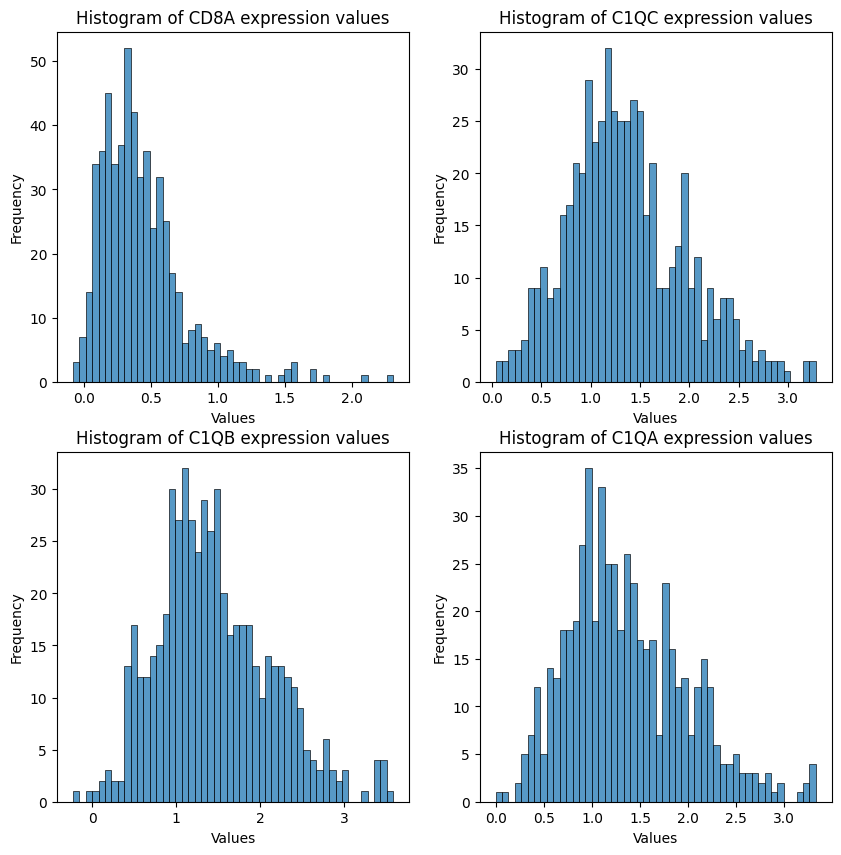

In [57]:
plot_expression_histograms(selected_expression)

In [58]:
quantile_normalized_expression = skp.quantile_transform(selected_expression, output_distribution='normal', copy=False)
quantile_normalized_expression = pd.DataFrame(quantile_normalized_expression, columns=selected_expression.columns)
quantile_normalized_expression.head()

c:\Users\victo\anaconda3\envs\survivalplot\Lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (1000) is greater than the total number of samples (556). n_quantiles is set to n_samples.
  warnings.warn(


Symbol,CD8A,C1QC,C1QB,C1QA
0,0.760682,1.046142,0.713275,0.430727
1,0.854564,1.030655,0.867651,0.848075
2,-1.318347,0.766728,0.695908,0.506348
3,0.006775,0.574299,0.133632,0.314484
4,-0.272047,2.365248,2.365248,5.199338


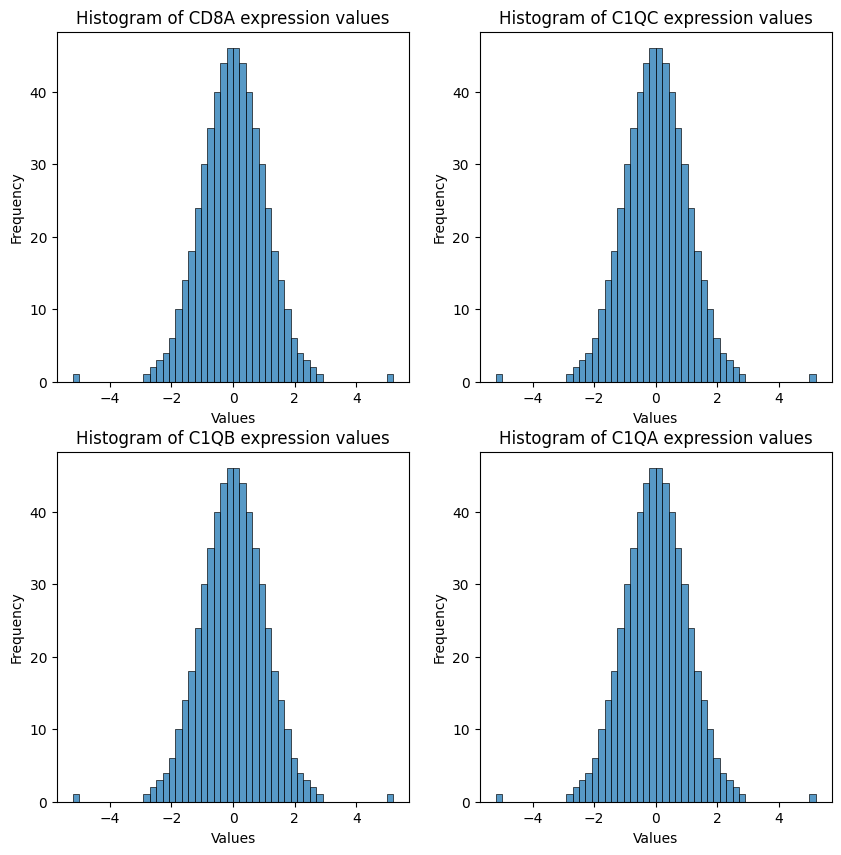

In [59]:
plot_expression_histograms(quantile_normalized_expression)

In [61]:
quantile_normalized_expression["SampleID"] = expression["SampleID"]
quantile_normalized_expression

Symbol,CD8A,C1QC,C1QB,C1QA,SampleID
0,0.760682,1.046142,0.713275,0.430727,GSM971957
1,0.854564,1.030655,0.867651,0.848075,GSM971958
2,-1.318347,0.766728,0.695908,0.506348,GSM971959
3,0.006775,0.574299,0.133632,0.314484,GSM971960
4,-0.272047,2.365248,2.365248,5.199338,GSM971961
...,...,...,...,...,...
551,-0.506348,-1.046142,-0.415908,-0.406079,GSM972119
552,1.077894,0.425777,1.217475,1.023003,GSM972120
553,-1.329195,-1.987682,-1.658100,-1.754883,GSM972122
554,-0.425777,-1.574745,-1.266301,-1.180408,GSM972123


In [62]:
quantile_normalized_expression.to_csv("quantile_normalized_expression.csv", index=False)